# Imports

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# Read File

In [7]:
# load the training dataset
df = pd.read_csv('Data/diabetes.csv')
df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


# User Config

In [3]:
class Config:
    def __init__(self):
        self.features = ['Pregnancies',
                         'PlasmaGlucose',
                         'DiastolicBloodPressure',
                         'TricepsThickness',
                         'SerumInsulin',
                         'BMI',
                         'DiabetesPedigree',
                         'Age'
                        ]
        self.label = 'Diabetic'
        
config = Config()

In [5]:
config.features

['Pregnancies',
 'PlasmaGlucose',
 'DiastolicBloodPressure',
 'TricepsThickness',
 'SerumInsulin',
 'BMI',
 'DiabetesPedigree',
 'Age']

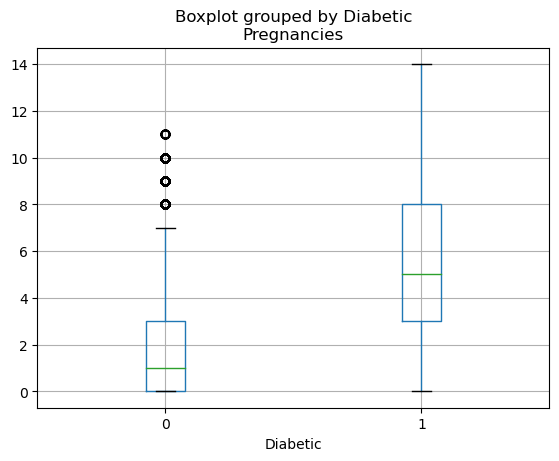

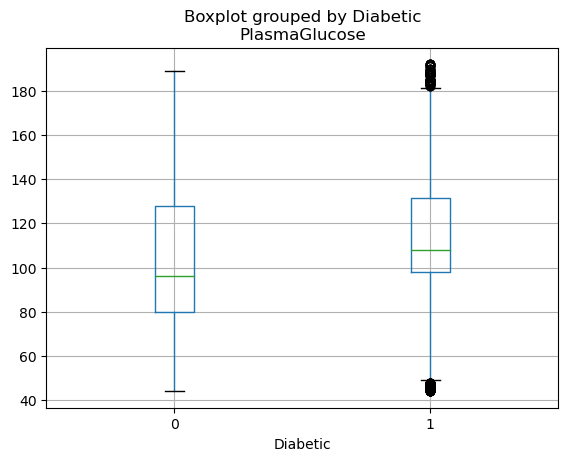

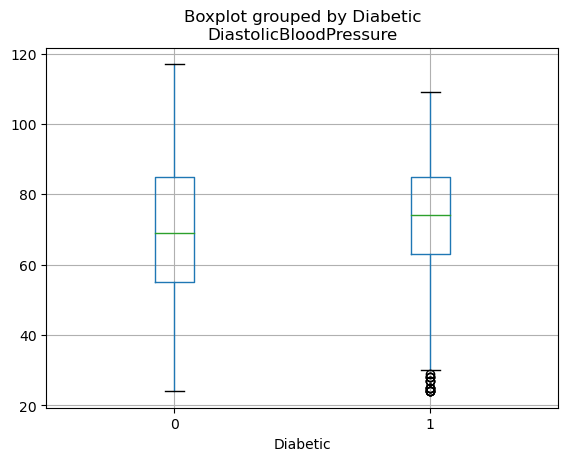

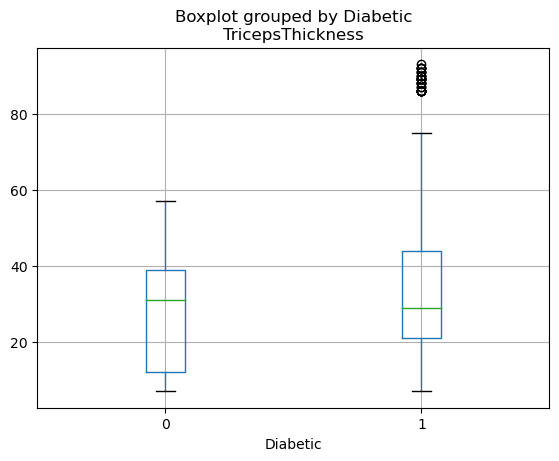

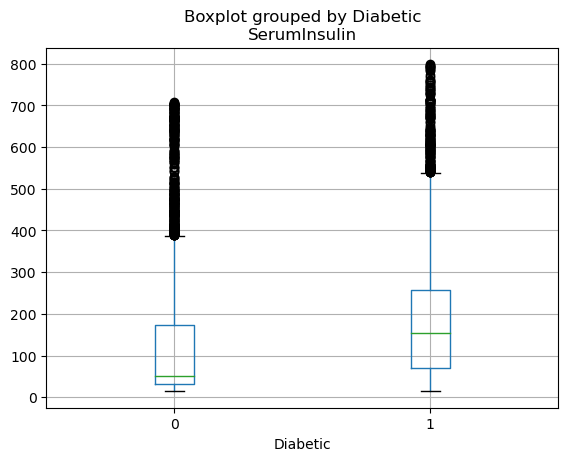

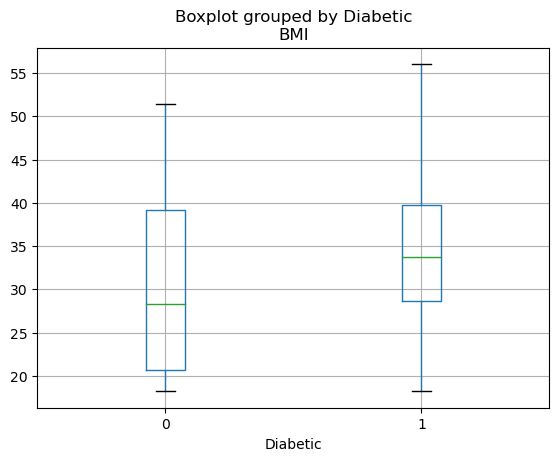

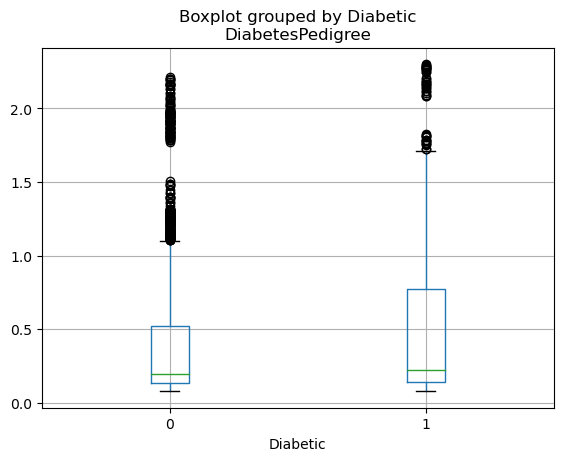

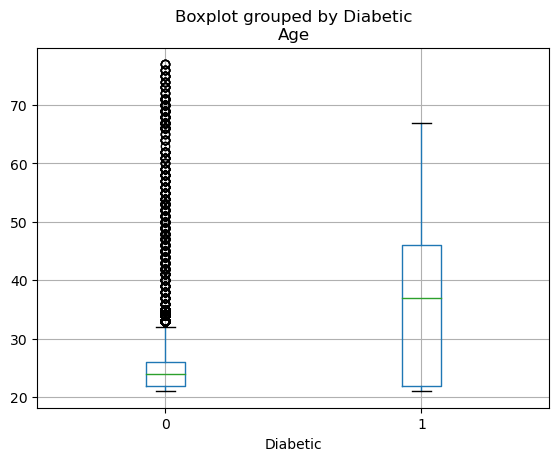

In [9]:
for col in config.features:
    df.boxplot(column=col, by=config.label, figsize=(6,6))
    plt.title(col)
plt.show()

# EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


(15000, 10)

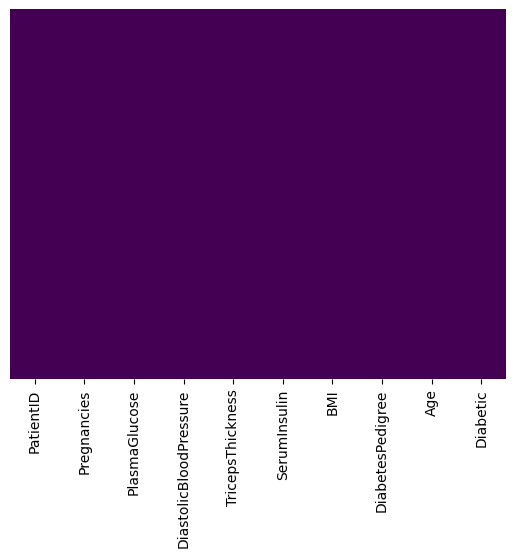

In [14]:
df.isnull().sum()

sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

df.isna().sum() / len(df)*100

df.head()

df.info()

df.describe()

df.shape


# Preprocessing

# 

# Train Test Split

In [16]:
X = df[config.features].values

y = df[config.label].values


In [17]:
# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 10500
Test cases: 4500


# Modelling

In [ ]:
# Train the model


model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
print (model)

In [19]:
# train a Decisition Tree Classifier model on the training set
dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)

predictions = dtree.predict(X_test)

In [24]:
print('Accuracy: ', accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))

print(classification_report(y_test,predictions))

Accuracy:  0.8975555555555556
[[2772  214]
 [ 247 1267]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      2986
           1       0.86      0.84      0.85      1514

    accuracy                           0.90      4500
   macro avg       0.89      0.88      0.88      4500
weighted avg       0.90      0.90      0.90      4500



[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]


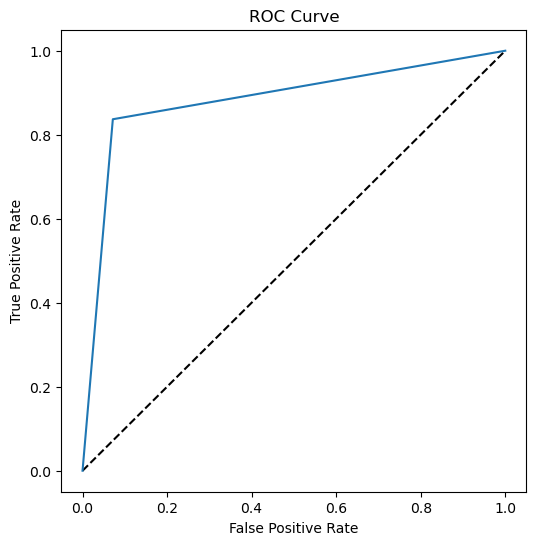

In [27]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

y_scores = dtree.predict_proba(X_test)
print(y_scores)

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [28]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.8825941137903789


# Save Model

In [ ]:
import joblib

# Save the model as a pickle file
# filename = './models/diabetes_model.pkl'
# joblib.dump(model, filename)